In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
x = pd.read_csv("LR Data/LinearX.csv").values
y=pd.read_csv("LR Data/linearY.csv").values

In [3]:
x.shape

(99, 1)

In [4]:
np.mean(x)

8.05151515151515

In [5]:
np.std(x)

1.728627857571563

In [6]:
x_norm = (x-x.mean())/(x.std())

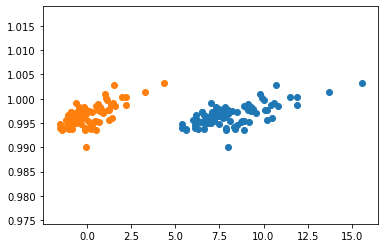

In [7]:
plt.scatter(x,y)
plt.scatter(x_norm,y)
plt.show()

In [8]:
def hypothesis(x,theta):
    
    return theta[0] + theta[1]*x

In [9]:
hypothesis(7,np.array([1.5,2]))

15.5

In [10]:
def error(x,y,theta):
    m=x.shape[0]
    total_err = 0.
    for i in range(m):
        y_=hypothesis(x[i],theta)
        total_err+=(y_-y[i])**2
    return float(total_err/m)
    

In [11]:
error(x,y,np.array([0,0.2]))

0.4951809352525252

In [12]:
def gradient(x,y,theta):
    m = x.shape[0]
    grad = np.zeros(2)
    for i in range(m):
        y_=hypothesis(x[i],theta)
        grad[0] += (y_-y[i])
        grad[1] += (y_-y[i])*x[i]
    return grad/m

In [13]:
def gradient_des(x,y,lr=0.1,max_itr = 100):
    m=x.shape
    theta = np.zeros(2)
    losses = []
    
    for i in range(max_itr):
        e = error(x,y,theta)
        losses.append(e)
        grad = gradient(x,y,theta)
        theta[0]= theta[0]-lr*grad[0]
        theta[1] = theta[1]-lr*grad[1]
        
        
    return theta,losses
    

In [14]:
Theta ,Losses =gradient_des(x_norm,y)

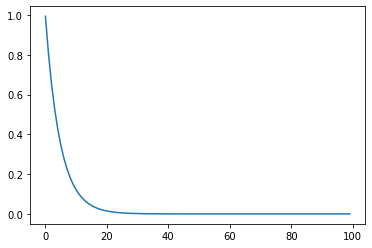

In [15]:
plt.plot(Losses)

In [16]:
Theta

array([0.99660767, 0.0013579 ])

In [17]:
x_test = np.array([-1,0,1,2,4,5])

In [18]:
hypothesis(x_test,Theta)

array([0.99524977, 0.99660767, 0.99796557, 0.99932348, 1.00203928,
       1.00339719])

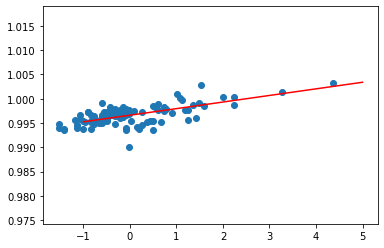

In [19]:
y_pred=hypothesis(x_test,Theta)
plt.scatter(x_norm,y)
plt.plot(x_test,y_pred,color="red")
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lin_reg = LinearRegression()

In [22]:
lin_reg.fit(x_norm,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lin_reg.intercept_

array([0.99663414])

In [24]:
lin_reg.coef_

array([[0.00135794]])

In [25]:
lin_reg.predict(x_test.reshape((-1,1)))

array([[0.9952762 ],
       [0.99663414],
       [0.99799208],
       [0.99935002],
       [1.0020659 ],
       [1.00342384]])